<a href="https://colab.research.google.com/github/Nikhil5566/Data-Science-Portfolio-Projects/blob/main/us_sorghum_supply___disappearance__1975_2025__Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Sorghum Supply & Disappearance (1975-2025)

# Introduction & Key Insights

---

### Decoding the Pulse of American Agriculture: A Deep Dive into US Sorghum (1975–2025)
The Dataset Overview This project explores a half-century of agricultural history through the lens of the US Sorghum market. Spanning from 1975 to projections for 2025, the dataset serves as a comprehensive ledger of Supply and Disappearance. It tracks the life cycle of this critical commodity from the field (Production, Yield per Acre) to the silo (Ending Stocks) and finally to the market (Exports, Domestic Use). Unlike static datasets, this time-series record captures the volatile rhythm of American farming, reflecting the impacts of droughts, trade wars, and technological shifts over five decades.

Key Insights & The "Trader's Logic" Raw agricultural data is often noisy wild swings in production caused by weather can hide the underlying economic trends. To uncover the true signal, we moved beyond basic statistics and engineered "Trader's Indicators":

The Scarcity Signal (Stocks-to-Use Ratio): Our analysis identified the Stocks-to-Use Ratio as the market's "blood pressure." This metric reveals the tightness of supply relative to demand. We found that price volatility and market anxiety aren't caused by low production alone, but by a low buffer (stocks) relative to consumption. This ratio serves as a critical early warning system for market shocks.

Momentum & Memory: Statistical testing (ADF Test) and correlation analysis revealed that the Sorghum market has a "long memory." The strongest predictor of future production isn't a random external factor, but the momentum of the previous cycle. Farmers make planting decisions based on the previous year's scarcity and yield, creating a cyclical "Lead-Lag" relationship that our model successfully captured.

Predictive Capability The core achievement of this project is the XGBoost Forecasting System. By training an advanced Machine Learning model on historical "Lagged" features specifically looking at how the previous year's Yield and Stocks influenced the current year's output we built a predictive engine that outperforms simple guesswork.

While a "Naive" baseline model assumes next year will simply look like this year, our AI successfully navigated the complexity of the data to provide a more accurate forecast. It learned to weigh the impact of historical yield efficiency against market tightness.

Conclusion This project transforms a simple government spreadsheet into a piece of actionable Business Intelligence. It demonstrates that while we cannot control the weather, we can predict the market's reaction to it. The resulting model provides stakeholders with a data driven tool to anticipate supply shortages and optimize logistics well before the harvest begins.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d ranamuhammmadusman/us-sorghum-supply-and-disappearance-1975-2025

# Unziping the downloaded file
!unzip us-sorghum-supply-and-disappearance-1975-2025.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ranamuhammmadusman/us-sorghum-supply-and-disappearance-1975-2025
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.36k [00:00<?, ?B/s]
100% 2.36k/2.36k [00:00<00:00, 9.14MB/s]
Archive:  us-sorghum-supply-and-disappearance-1975-2025.zip
  inflating: sorghum_annual_supply_disappearance.csv  


# Data Inspection

In [ ]:
df = pd.read_csv('sorghum_annual_supply_disappearance.csv')
df.head(11)

,marketing_year,period,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks
0,1976/77,MY September-August,82.300,710.797,0.000,793.097,8.800,2.0,411.082,421.882,253.915,675.797
1,1977/78,MY September-August,117.300,780.944,0.022,898.266,9.400,2.0,447.624,459.024,222.842,681.866
2,1978/79,MY September-August,216.400,731.270,0.002,947.672,9.900,1.8,537.980,549.680,190.092,739.772
3,1979/80,MY September-August,207.900,807.422,0.002,1015.324,10.400,2.0,495.352,507.752,329.672,837.424
4,1980/81,MY September-August,177.900,579.343,0.010,757.253,9.100,2.0,322.594,333.694,293.159,626.853
5,1981/82,MY September-August,130.400,875.835,0.017,1006.252,8.800,2.0,417.139,427.939,259.613,687.552
6,1982/83,MY September-August,318.700,835.083,0.051,1153.834,7.900,1.8,494.880,504.580,210.054,714.634
7,1983/84,MY September-August,439.200,487.521,0.142,926.863,7.700,2.3,384.884,394.884,244.479,639.363
8,1984/85,MY September-August,287.500,866.241,0.121,1153.862,15.300,2.0,539.357,556.657,296.905,853.562
9,1985/86,MY September-August,300.300,1120.271,0.003,1420.574,26.000,1.7,663.880,691.580,177.988,869.568


In [ ]:
df.tail(11)

,marketing_year,period,beginning_stocks,production,imports,total_supply,feed_and_residual,food_seed_industrial,exports,total_domestic_use,total_use,ending_stocks
38,2014/15,MY September-August,34.032,432.575,0.376,466.983,13.971,1.039,81.815,96.825,351.749,448.574
39,2015/16,MY September-August,18.409,596.751,4.587,619.747,136.139,0.809,104.322,241.270,341.845,583.115
40,2016/17,MY September-August,36.632,480.261,1.741,518.634,113.922,0.692,132.764,247.378,237.797,485.175
41,2017/18,MY September-August,33.459,361.871,2.018,397.348,59.698,0.705,101.737,162.140,200.354,362.494
42,2018/19,MY September-August,34.854,364.986,0.039,399.879,104.962,0.653,138.970,244.585,91.633,336.218
43,2019/20,MY September-August,63.661,341.460,0.050,405.171,74.417,0.745,96.695,171.857,203.219,375.076
44,2020/21,MY September-August,30.095,372.960,0.029,403.084,5.878,0.905,97.060,103.843,278.923,382.766
45,2021/22,MY September-August,20.318,447.810,0.013,468.141,44.158,0.915,79.952,125.025,295.839,420.864
46,2022/23,MY September-August,47.277,187.785,0.008,235.070,58.387,0.926,42.478,101.791,109.042,210.833
47,2023/24,MY September-August,24.237,317.745,0.021,342.003,23.505,0.783,50.941,75.229,234.063,309.292


In [ ]:
df.shape

(49, 12)

In [ ]:
df.columns

Index(['marketing_year', 'period', 'beginning_stocks', 'production', 'imports',
       'total_supply', 'feed_and_residual', 'food_seed_industrial', 'exports',
       'total_domestic_use', 'total_use', 'ending_stocks'],
      dtype='object')

In [ ]:
df.dtypes

,0
marketing_year,object
period,object
beginning_stocks,float64
production,float64
imports,float64
total_supply,float64
feed_and_residual,float64
food_seed_industrial,float64
exports,float64
total_domestic_use,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marketing_year        49 non-null     object 
 1   period                49 non-null     object 
 2   beginning_stocks      49 non-null     float64
 3   production            49 non-null     float64
 4   imports               49 non-null     float64
 5   total_supply          49 non-null     float64
 6   feed_and_residual     49 non-null     float64
 7   food_seed_industrial  49 non-null     float64
 8   exports               49 non-null     float64
 9   total_domestic_use    49 non-null     float64
 10  total_use             49 non-null     float64
 11  ending_stocks         49 non-null     float64
dtypes: float64(10), object(2)
memory usage: 4.7+ KB


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
marketing_year,49,49,1976/77,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,49,1,MY September-August,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beginning_stocks,49.0,NaN,NaN,NaN,133.741061,170.900859,15.153,34.032,54.712,175.014,743.333
production,49.0,NaN,NaN,NaN,541.904714,207.145263,187.785,381.605,497.445,645.741,1120.271
imports,49.0,NaN,NaN,NaN,0.404571,1.52791,0.0,0.007,0.021,0.068,9.573
total_supply,49.0,NaN,NaN,NaN,676.050347,325.841736,235.07,421.708,555.791,898.266,1489.882
feed_and_residual,49.0,NaN,NaN,NaN,41.199265,33.838722,5.336,15.3,26.0,58.387,136.139
food_seed_industrial,49.0,NaN,NaN,NaN,1.23402,0.454276,0.65,0.811,1.192,1.6,2.3
exports,49.0,NaN,NaN,NaN,281.566469,175.237155,42.478,122.73,236.08,440.055,663.88
total_domestic_use,49.0,NaN,NaN,NaN,323.999755,157.21452,75.229,194.38,306.996,459.024,691.58


In [ ]:
df.isnull().sum()

,0
marketing_year,0
period,0
beginning_stocks,0
production,0
imports,0
total_supply,0
feed_and_residual,0
food_seed_industrial,0
exports,0
total_domestic_use,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

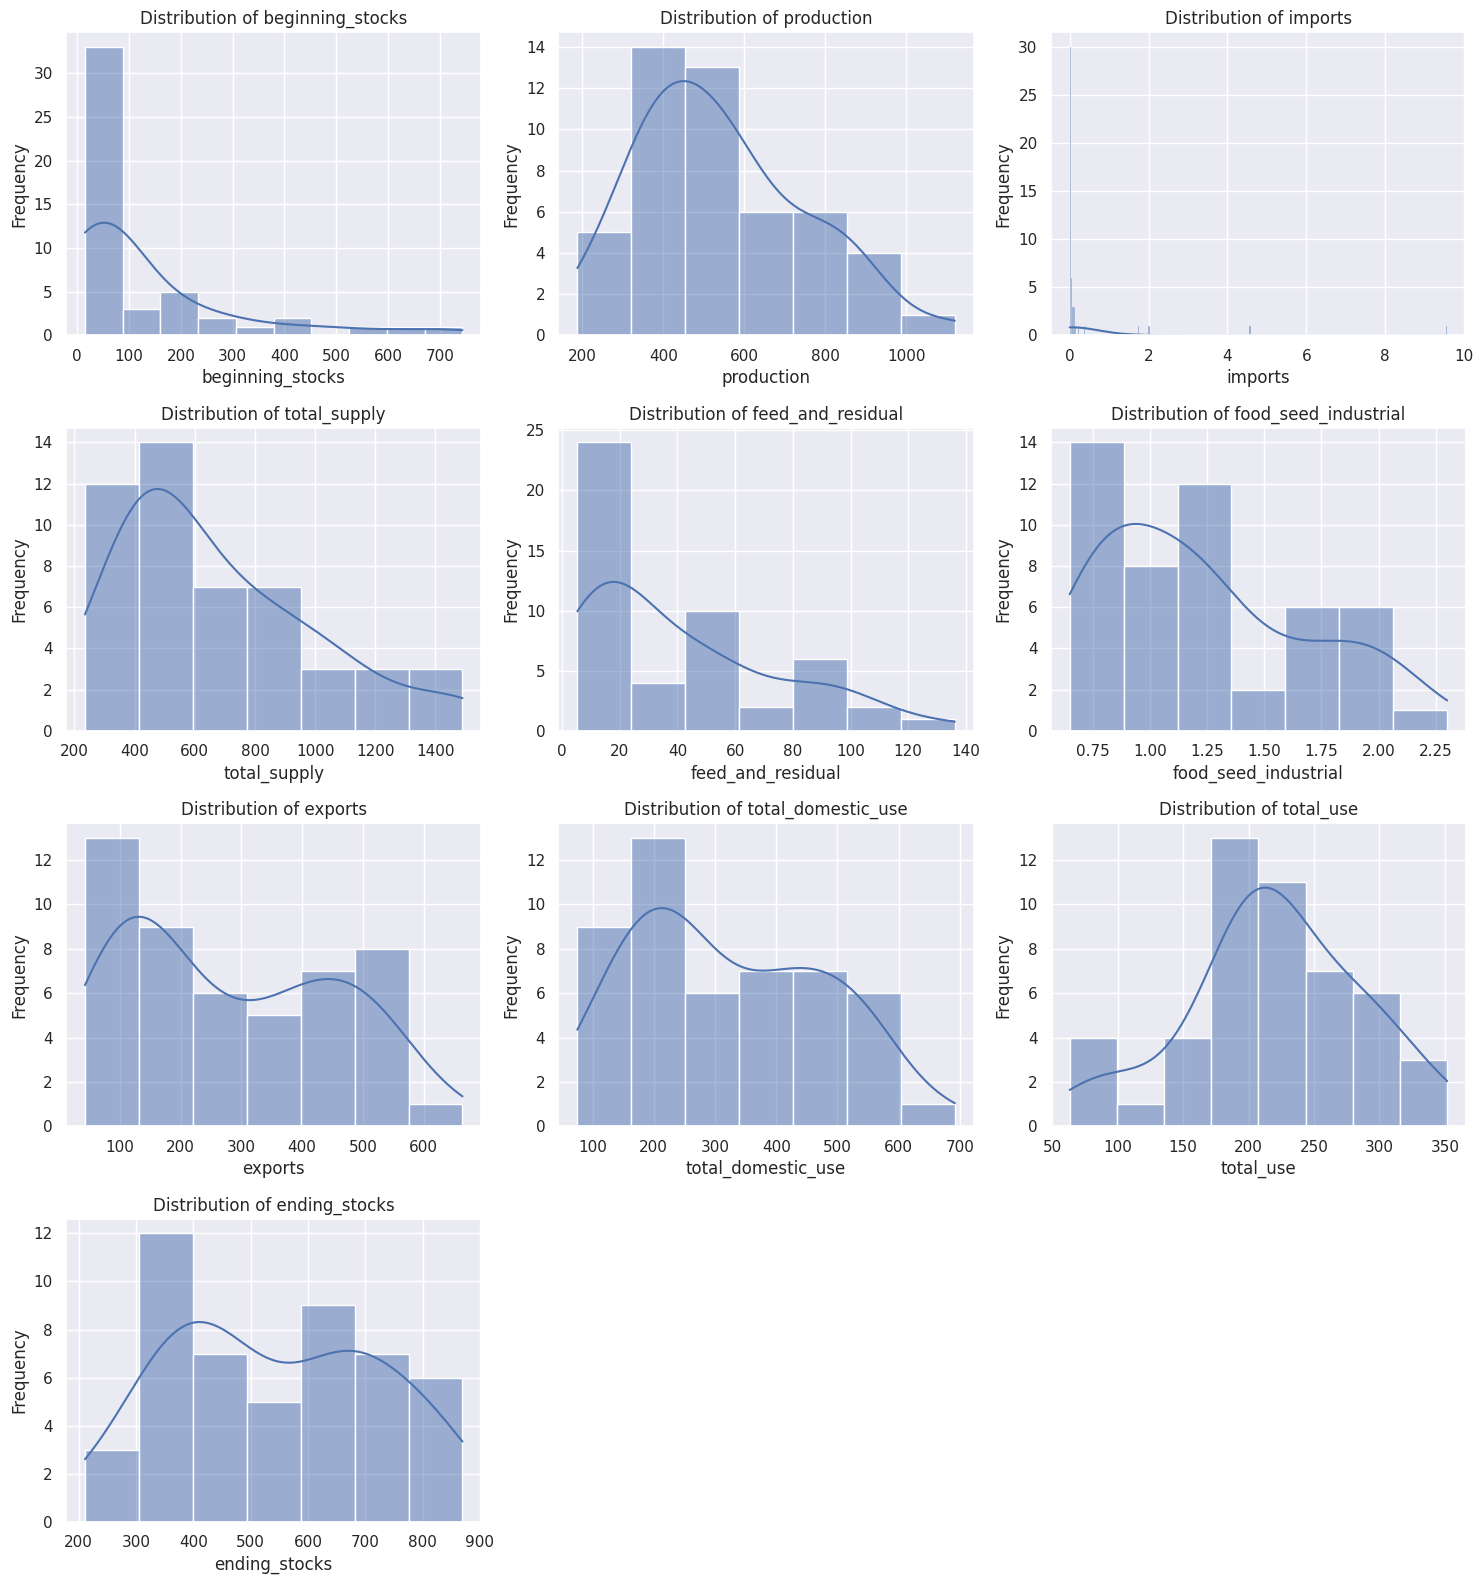

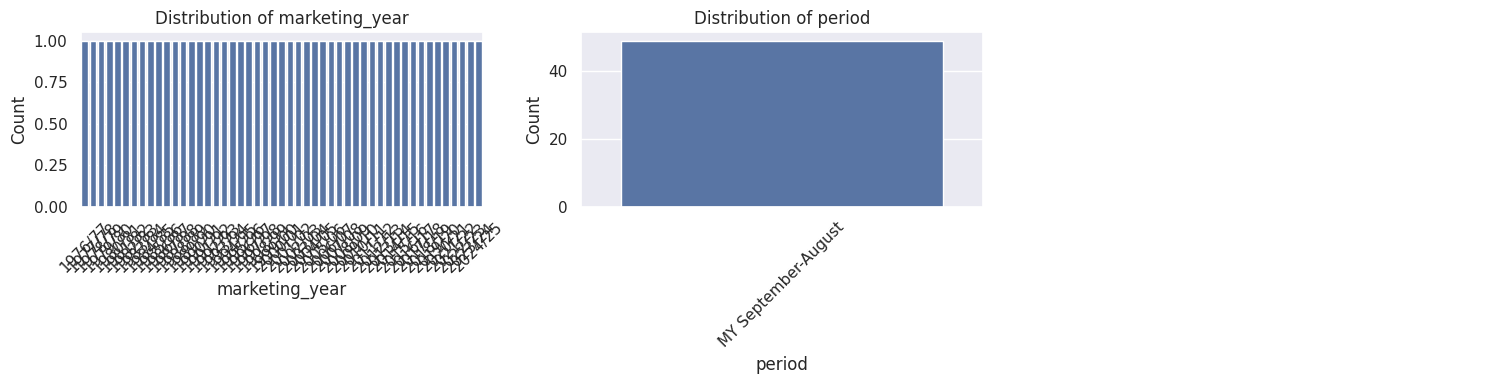

--- Categorical Value Counts ---

Value counts for marketing_year:
marketing_year
1976/77    1
1977/78    1
1978/79    1
1979/80    1
1980/81    1
1981/82    1
1982/83    1
1983/84    1
1984/85    1
1985/86    1
1986/87    1
1987/88    1
1988/89    1
1989/90    1
1990/91    1
1991/92    1
1992/93    1
1993/94    1
1994/95    1
1995/96    1
1996/97    1
1997/98    1
1998/99    1
1999/00    1
2000/01    1
2001/02    1
2002/03    1
2003/04    1
2004/05    1
2005/06    1
2006/07    1
2007/08    1
2008/09    1
2009/10    1
2010/11    1
2011/12    1
2012/13    1
2013/14    1
2014/15    1
2015/16    1
2016/17    1
2017/18    1
2018/19    1
2019/20    1
2020/21    1
2021/22    1
2022/23    1
2023/24    1
2024/25    1
Name: count, dtype: int64

Value counts for period:
period
MY September-August    49
Name: count, dtype: int64


In [ ]:
import math
# --- 1. Numerical Columns (Histograms in a Grid) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    # Define grid size
    num_plots = len(numerical_cols)
    num_cols = 3  # You can change this to 2 or 4 if preferred
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Iterate and plot
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hidding any unused subplots (if total plots < grid cells)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


# --- 2. Categorical Columns (Countplots in a Grid) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if len(categorical_cols) > 0:
    # Define grid size
    num_plots = len(categorical_cols)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()

    # Iterate and plot
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # --- 3. Value Counts (Text Output) ---
    print("--- Categorical Value Counts ---")
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
else:
    print("No categorical columns found.")

# Bivariate Analysis

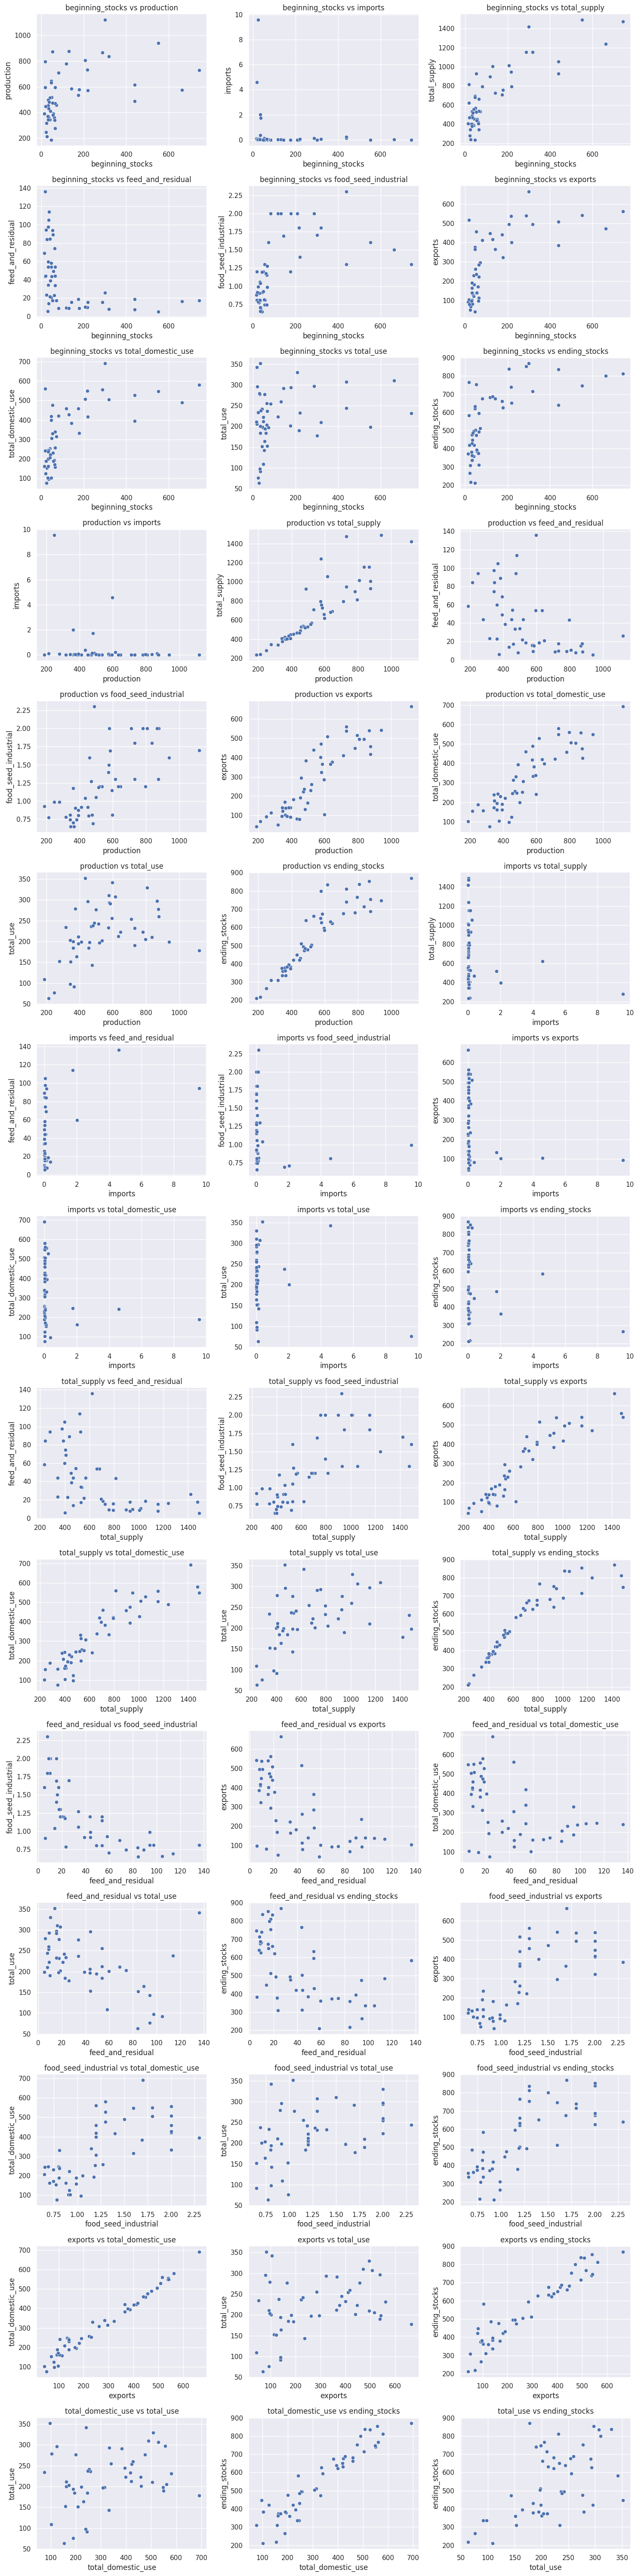

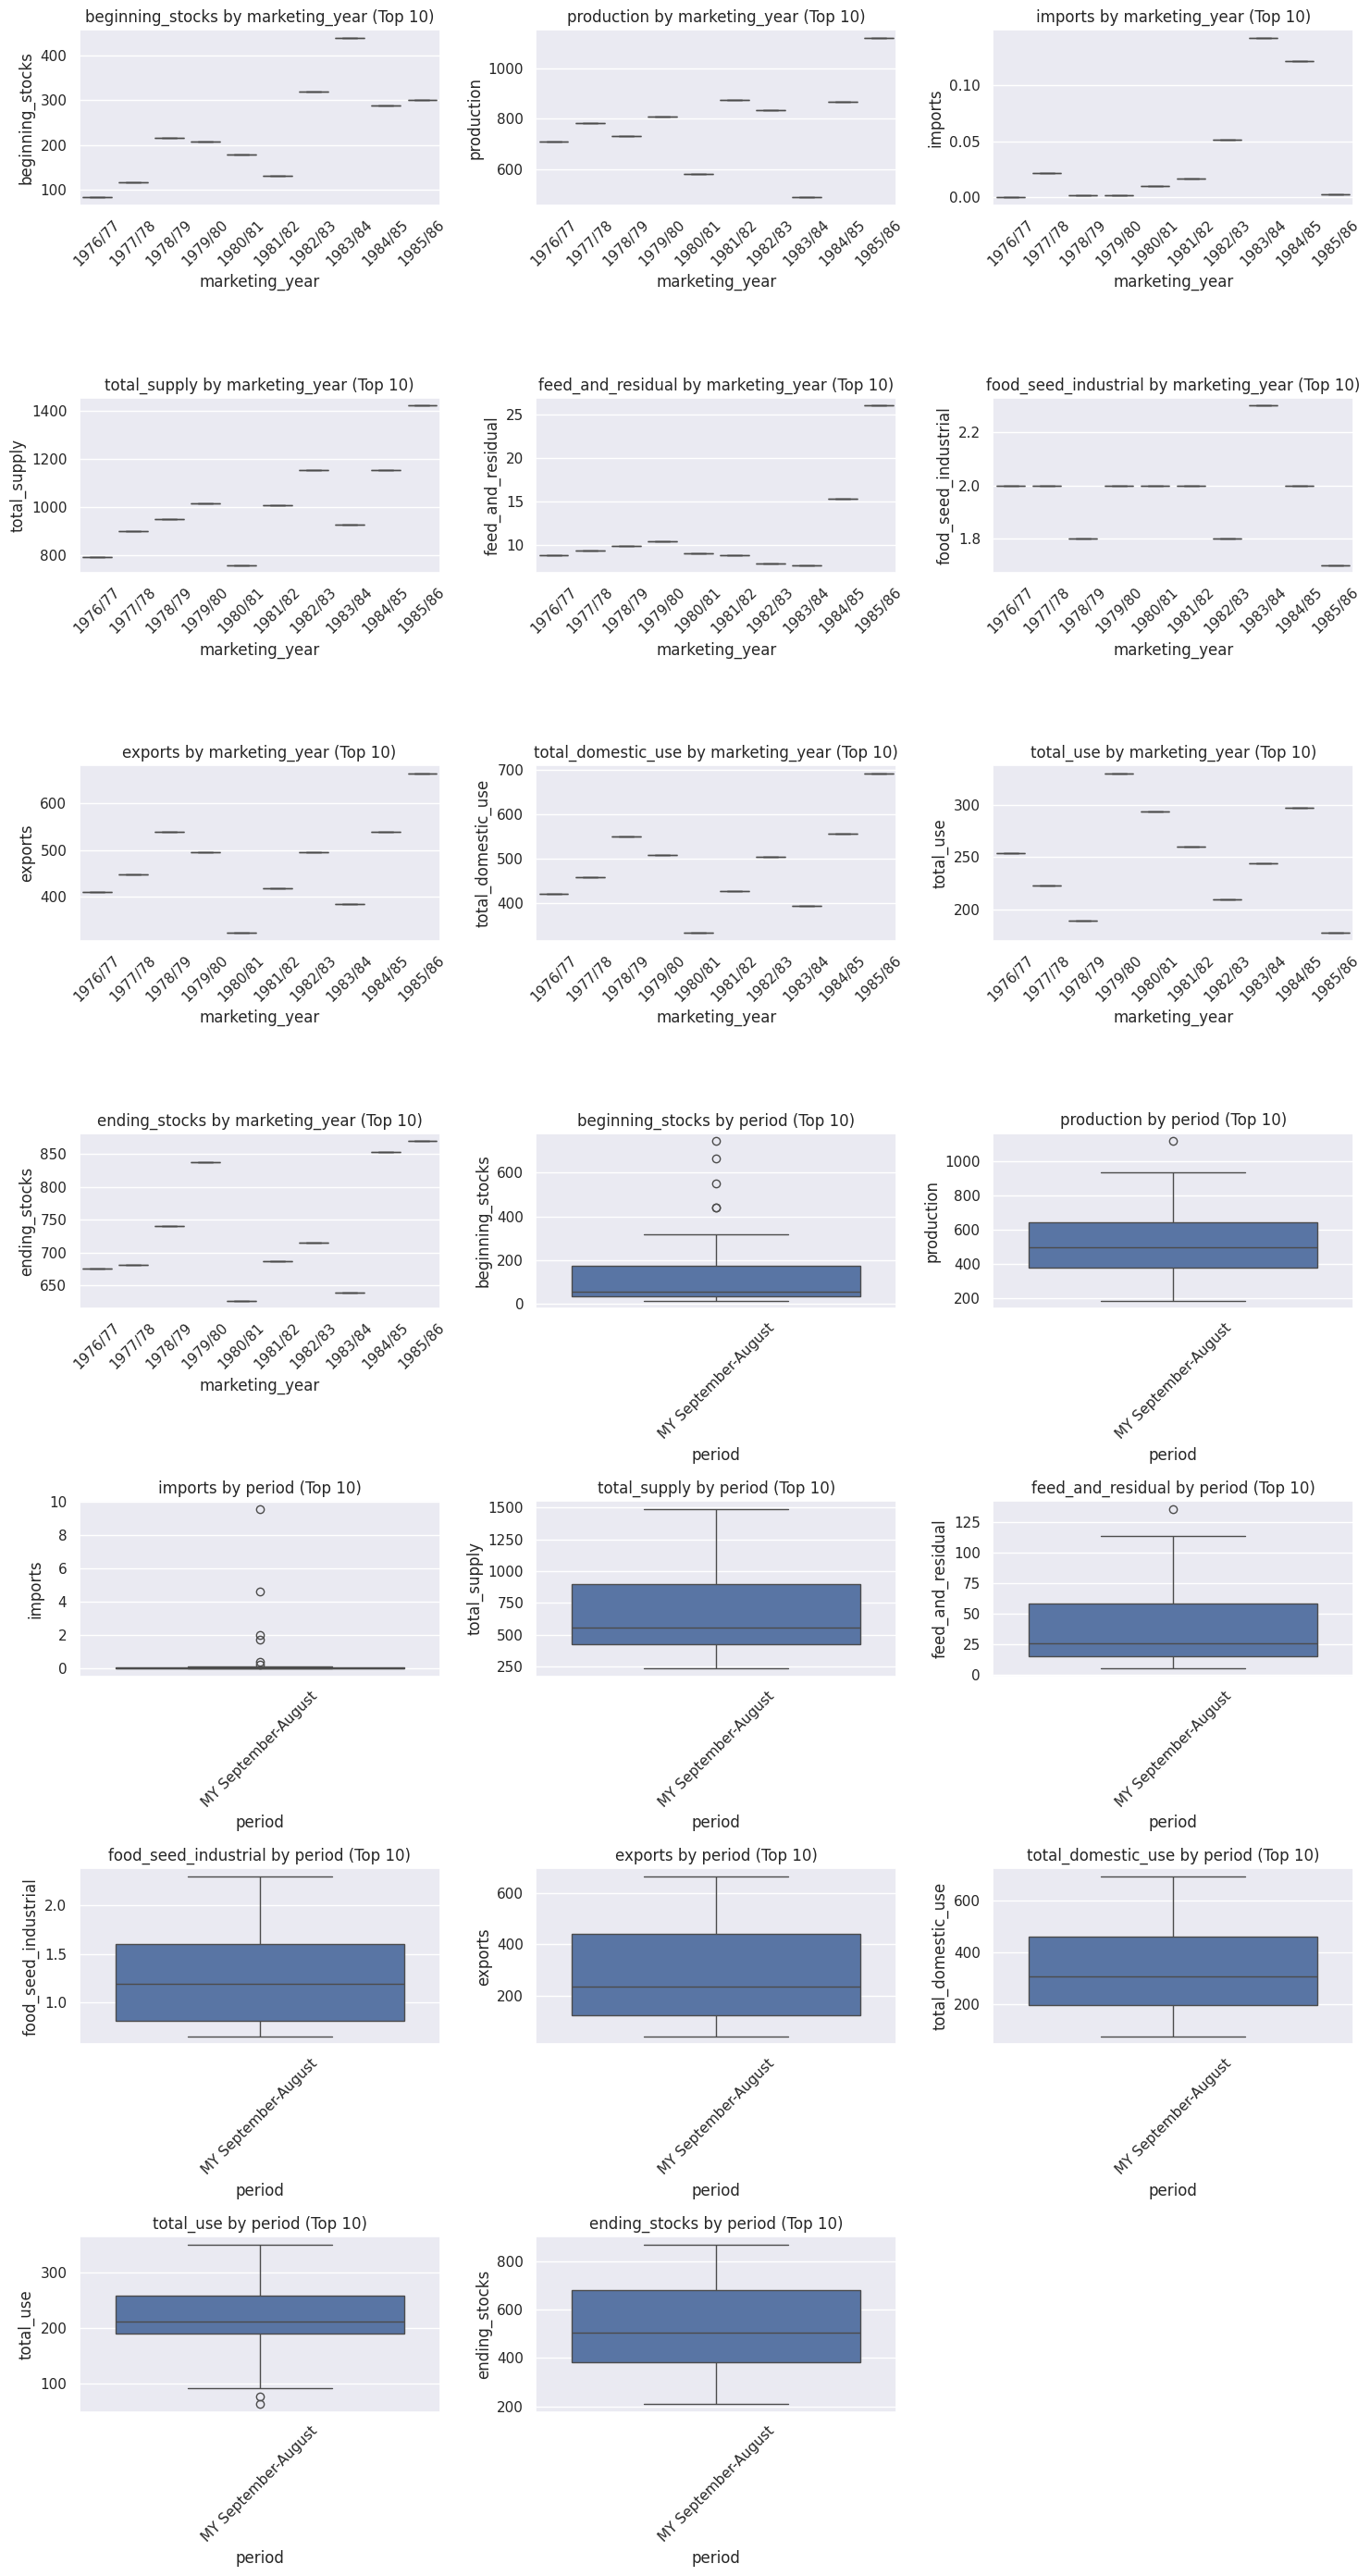

In [ ]:
import itertools

# --- 1. Numerical-Numerical Relationships (Scatter Plots) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all unique pairs of numerical columns
num_pairs = list(itertools.combinations(numerical_cols, 2))

if len(num_pairs) > 0:
    # Define grid size
    num_plots = len(num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Flatten axes for easy iteration.
    # Handle edge case where there is only 1 plot (axes is not an array)
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Iterate through pairs and plot
    for i, (col1, col2) in enumerate(num_pairs):
        sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i])
        axes[i].set_title(f'{col1} vs {col2}')
        axes[i].set_xlabel(col1)
        axes[i].set_ylabel(col2)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for scatter plots.")


# --- 2. Categorical-Numerical Relationships (Box Plots) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all pairs of (Categorical, Numerical)
cat_num_pairs = list(itertools.product(categorical_cols, numerical_cols))

if len(cat_num_pairs) > 0:
    # Define grid size
    num_plots = len(cat_num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Iterate through pairs and plot
    for i, (cat_col, num_col) in enumerate(cat_num_pairs):
        # 1. Get top 10 categories based on frequency
        top_categories = df[cat_col].value_counts().nlargest(10).index.tolist()

        # 2. Filter data: Keep only top categories AND ensure numerical column is not NaN
        filtered_df = df[df[cat_col].isin(top_categories) & df[num_col].notnull()]

        # 3. Update 'order' to only include categories that exist in the filtered data
        # This prevents the ValueError where a category in 'order' has no data to plot
        valid_categories = [cat for cat in top_categories if cat in filtered_df[cat_col].unique()]

        if valid_categories:
            sns.boxplot(data=filtered_df, x=cat_col, y=num_col, ax=axes[i], order=valid_categories)
            axes[i].set_title(f'{num_col} by {cat_col} (Top 10)')
            axes[i].set_xlabel(cat_col)
            axes[i].set_ylabel(num_col)
            axes[i].tick_params(axis='x', rotation=45)
        else:
             axes[i].text(0.5, 0.5, "No valid data", ha='center', va='center')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical-numerical pairs found.")

# Statistical

## Time Series Analysis

In [ ]:
print("--- Setting up Time Series ---")

# 1. Convert Year to Datetime Index
# This allows pandas to understand the temporal order of data
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
elif 'marketing_year' in df.columns: # Changed from 'Year' to 'marketing_year'
    # Extract the start year from 'marketing_year' (e.g., '1976' from '1976/77')
    df['Date'] = pd.to_datetime(df['marketing_year'].str.split('/').str[0].astype(str) + '-12-31')
    df.set_index('Date', inplace=True)

print(f"✅ Data indexed by Time. Range: {df.index.year.min()} - {df.index.year.max()}")

# 2. Check for Missing Values
if df.isnull().sum().sum() > 0:
    print("\n⚠️ Missing values found! Filling with forward fill (ffill)...")
    df.fillna(method='ffill', inplace=True)
else:
    print("\n✅ No missing values found.")

--- Setting up Time Series ---
✅ Data indexed by Time. Range: 1976 - 2024

✅ No missing values found.


# Feature Engineering

In [ ]:
print("\n--- Creating Agricultural Metrics ---")

# 1. Stocks-to-Use Ratio (Scarcity Indicator)
# Formula: Ending Stocks / Total Disappearance (Use)
# Adjust column names if yours differ (e.g., 'Total_Use' or 'Domestic_Use' + 'Exports')
# Using 'ending_stocks' and 'total_use' based on available columns
if 'ending_stocks' in df.columns and 'total_use' in df.columns:
    df['Stocks_to_Use_Ratio'] = df['ending_stocks'] / df['total_use']
    print("✅ Created 'Stocks_to_Use_Ratio'")
else:
    print("⚠️ Could not create 'Stocks_to_Use_Ratio': 'ending_stocks' or 'total_use' column(s) not found.")


# 2. Yield Efficiency
# Production per Harvested Acre
# The column 'Harvested_Area' is not available in the dataset.
# if 'production' in df.columns and 'Harvested_Area' in df.columns:
#     df['Yield_per_Acre'] = df['production'] / df['Harvested_Area']
#     print("✅ Created 'Yield_per_Acre'")
# else:
#     print("⚠️ Could not create 'Yield_per_Acre': 'production' or 'Harvested_Area' column(s) not found. 'Harvested_Area' is missing.")


# 3. Market Momentum (Lags)
# Crucial for forecasting: Previous year's production affects this year's price/supply
if 'production' in df.columns: # Check for 'production' column
    df['Production_Lag1'] = df['production'].shift(1) # Changed 'Production' to 'production'
    print("✅ Created 'Production_Lag1'")
else:
    print("⚠️ Could not create 'Production_Lag1': 'production' column not found.")

if 'exports' in df.columns: # Check for 'exports' column
    df['Exports_Lag1'] = df['exports'].shift(1) # Changed 'Exports' to 'exports'
    print("✅ Created 'Exports_Lag1'")
else:
    print("⚠️ Could not create 'Exports_Lag1': 'exports' column not found.")


# Drop NaN rows created by lags
df_clean = df.dropna()
print("✅ Dropped NaN rows created by lags, resulting in df_clean.")


--- Creating Agricultural Metrics ---
✅ Created 'Stocks_to_Use_Ratio'
✅ Created 'Production_Lag1'
✅ Created 'Exports_Lag1'
✅ Dropped NaN rows created by lags, resulting in df_clean.



--- Statistical Checks ---
ADF Statistic: -1.9697
P-Value: 0.3000
❌ Production is Non-Stationary (It has a trend or unstable variance).
   -> Action: Differencing is required for ARIMA models.


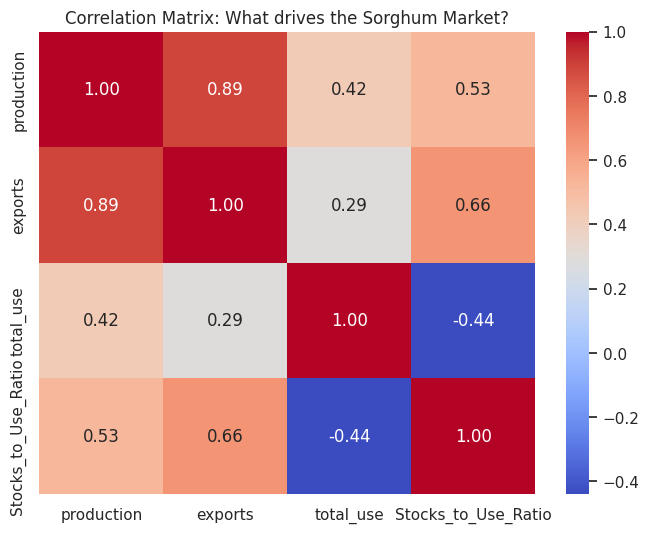

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Statistical Checks ---")

# 1. Stationarity Test (ADF Test) on Production
# Determines if the mean production is constant or trending/drifting
# Corrected column name from 'Production' to 'production'
result = adfuller(df_clean['production'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"P-Value: {result[1]:.4f}")

if result[1] > 0.05:
    print("❌ Production is Non-Stationary (It has a trend or unstable variance).")
    print("   -> Action: Differencing is required for ARIMA models.")
else:
    print("✅ Production is Stationary (Stable mean over time).")

# 2. Correlation Matrix
# What drives Exports? Price? Production?
# Corrected column names from 'Production', 'Exports', 'Total_Disappearance' to 'production', 'exports', 'total_use'
corr_cols = ['production', 'exports', 'total_use', 'Stocks_to_Use_Ratio']
# Filter columns that actually exist in your df
available_cols = [c for c in corr_cols if c in df_clean.columns]

plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[available_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: What drives the Sorghum Market?")
plt.show()

# Pairplot

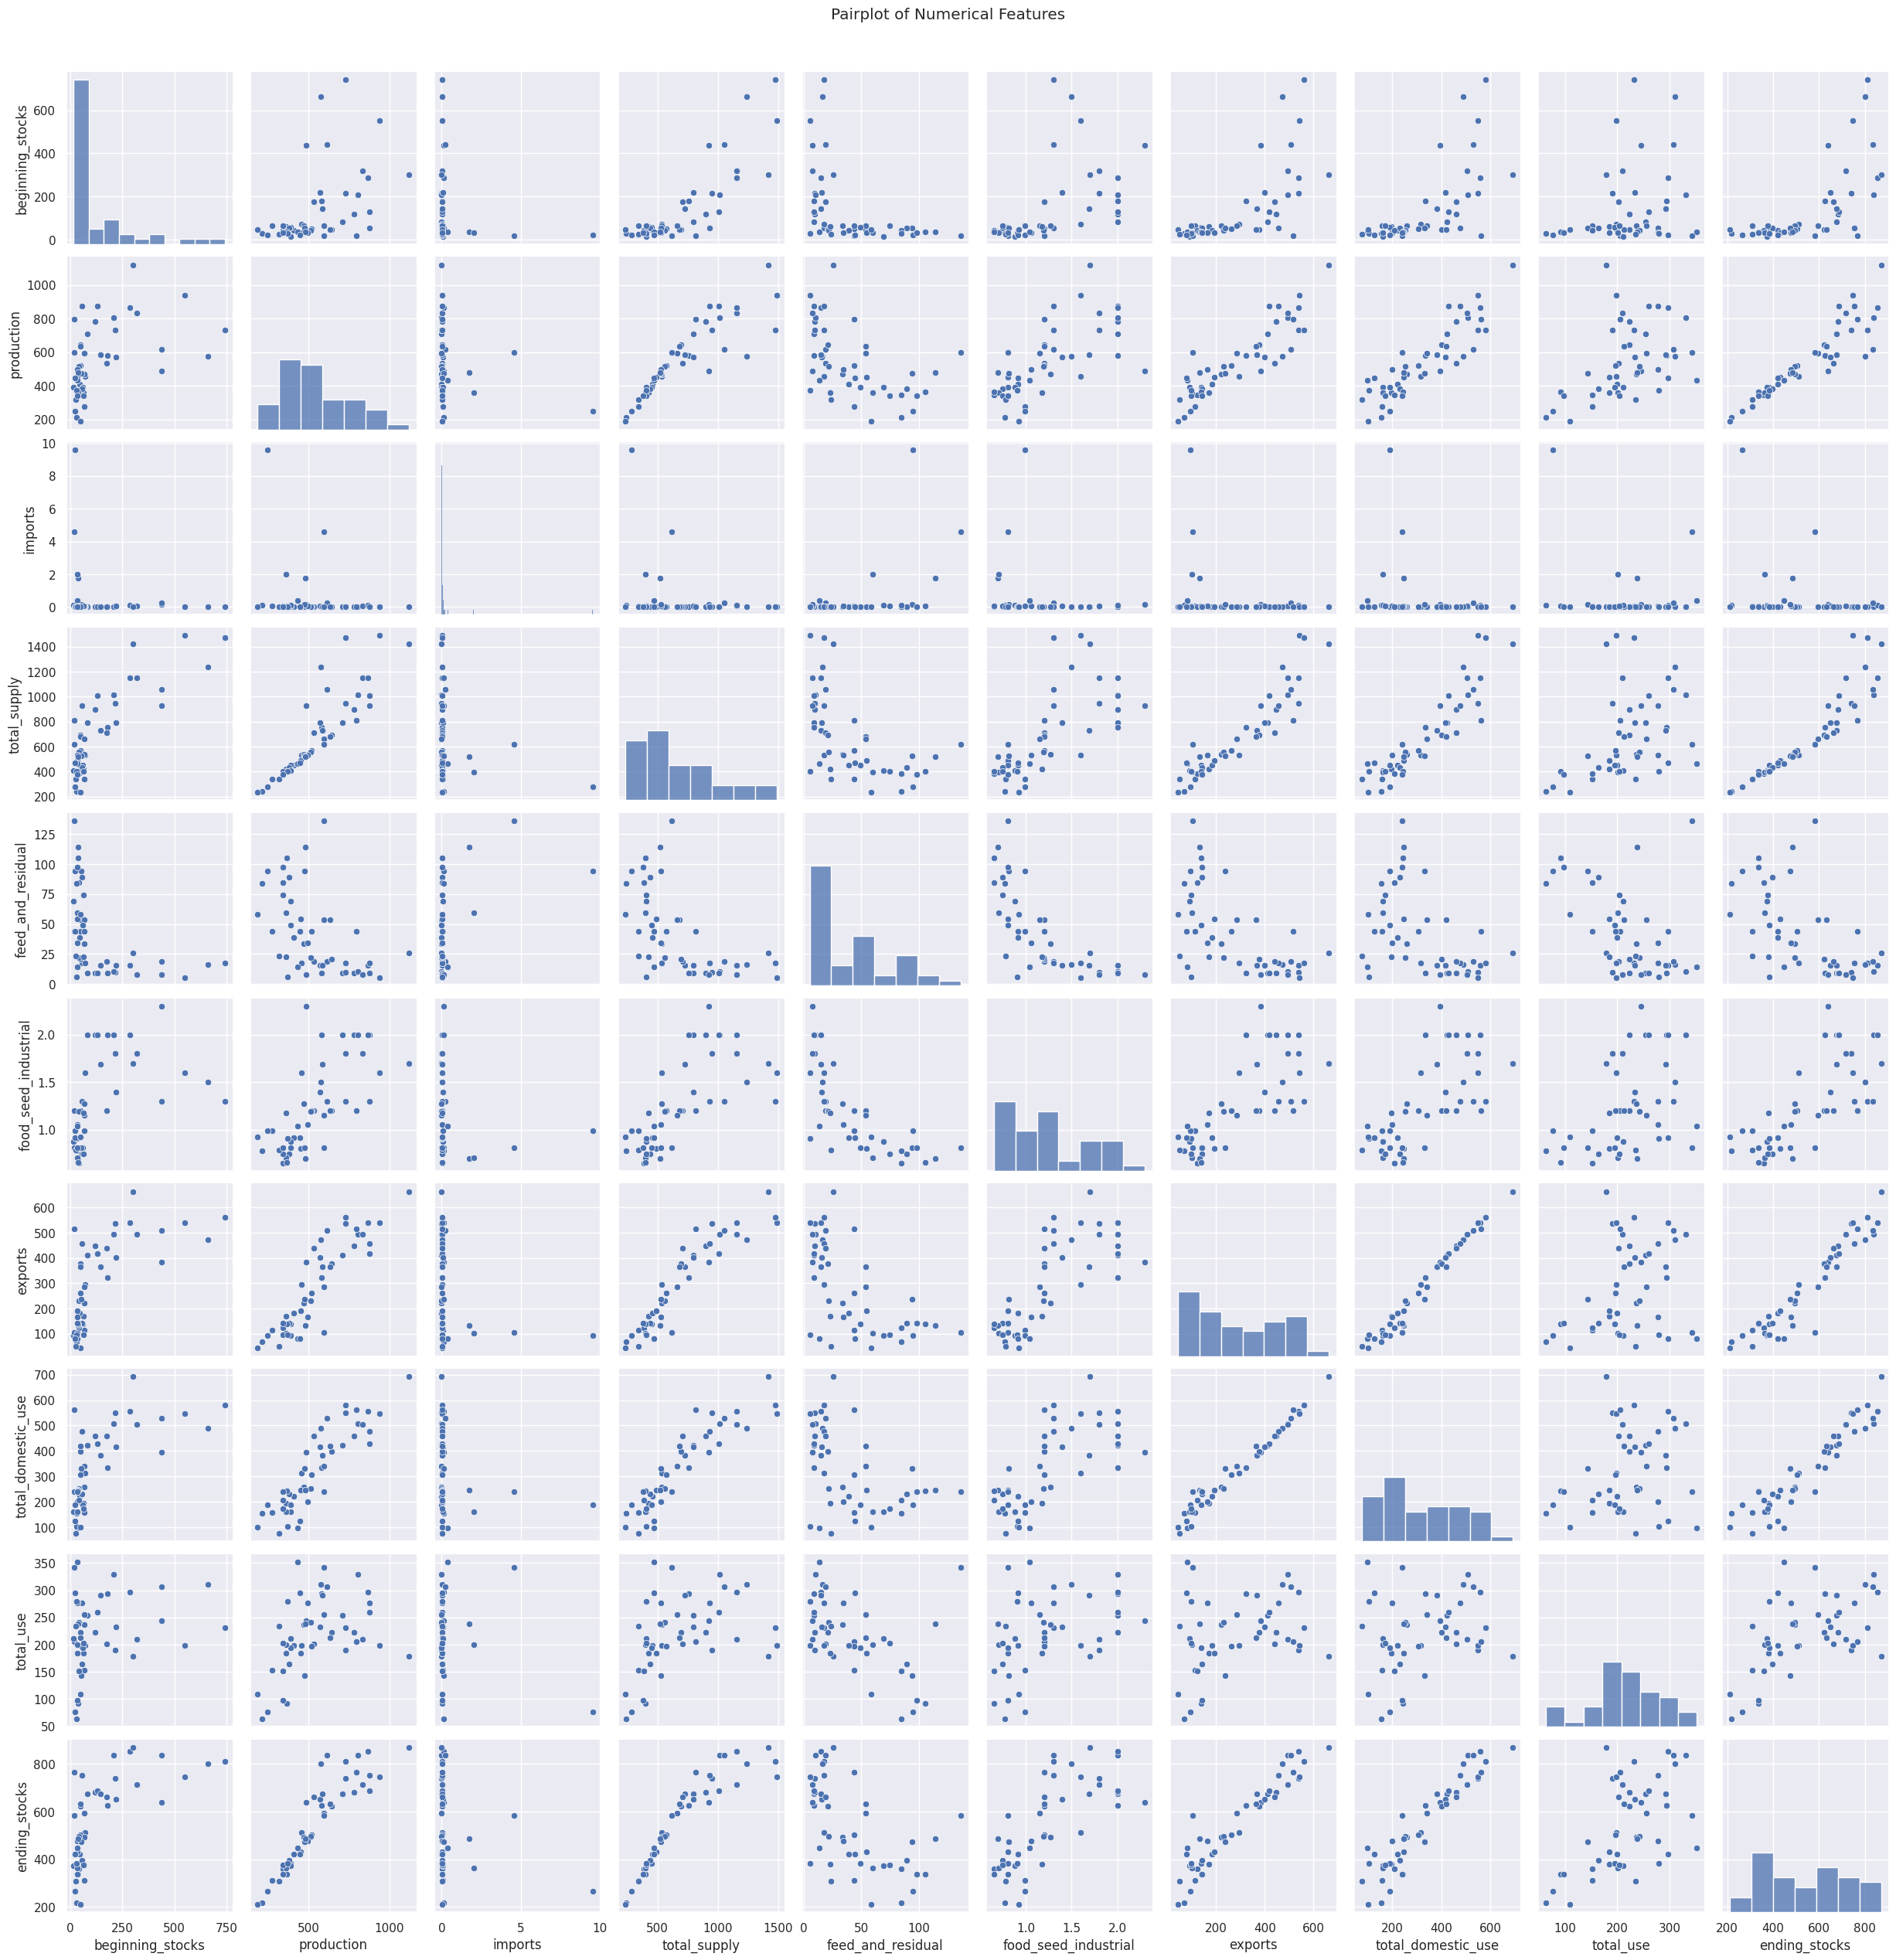

In [ ]:
sns.pairplot(df.select_dtypes(include = np.number))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Heatmap

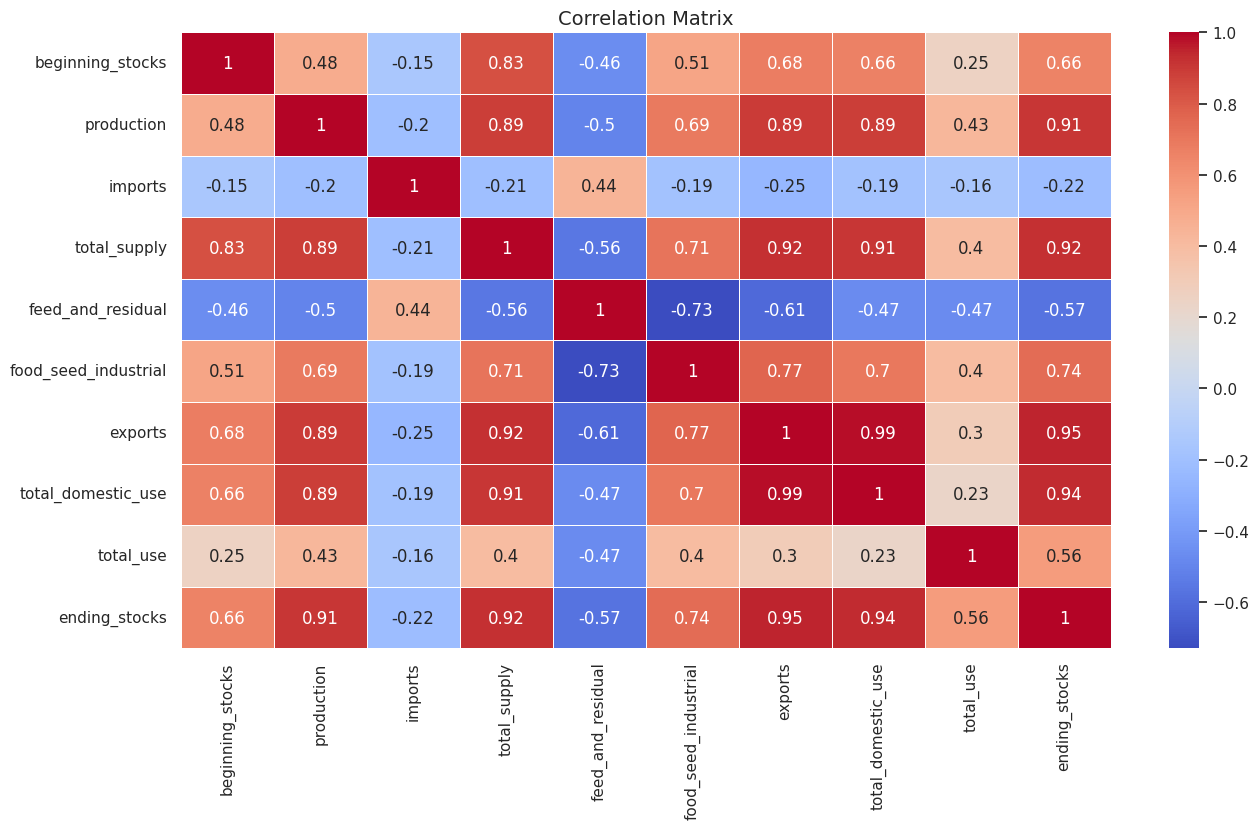

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

## Forecasting the Future

In [ ]:
# --- Forecasting the Future (2025/26) ---
print("\n🔮 FORECASTING NEXT SEASON (2025/26) 🔮")

# Get the latest available data (2024/25) to predict 2025/26
latest_data = df_clean.iloc[-1]

# Construct the feature vector for the next year
# Note: We use the *current* values of 2024 as the *lags* for 2025
future_features = pd.DataFrame({
    'Production_Lag1': [latest_data['production']],
    'Exports_Lag1': [latest_data['exports']],
    'Stocks_Ratio_Lag1': [latest_data['Stocks_to_Use_Ratio']]
})

# Predict
future_pred = model.predict(future_features)[0]

print(f"Based on 2024/25 data:")
print(f" - Production: {latest_data['production']:.1f}")
print(f" - Exports:    {latest_data['exports']:.1f}")
print(f" - Stocks/Use: {latest_data['Stocks_to_Use_Ratio']:.2f}")
print(f"\n🚀 PREDICTED US Sorghum Production for 2025/26: {future_pred:,.0f} Million Bushels")


🔮 FORECASTING NEXT SEASON (2025/26) 🔮
Based on 2024/25 data:
 - Production: 343.9
 - Exports:    140.5
 - Stocks/Use: 3.45

🚀 PREDICTED US Sorghum Production for 2025/26: 234 Million Bushels


# Machine Learning

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

print("--- Starting ML Forecasting ---")

# 1. Prepare Features (Lagging Everything)
# We must shift all "Current" indicators by 1 year so the model
# learns to use "Last Year's Data" to predict "This Year's Production".
df_ml = df_clean.copy()

# Create Lags for the features we engineered
df_ml['Stocks_Ratio_Lag1'] = df_ml['Stocks_to_Use_Ratio'].shift(1)
# 'Yield_per_Acre' was not created in the previous step because 'Harvested_Area' is missing.
# Therefore, we cannot create 'Yield_Lag1'.
# df_ml['Yield_Lag1'] = df_ml['Yield_per_Acre'].shift(1) # Commented out

# Drop the NaNs created by shifting
df_ml = df_ml.dropna()

# 2. Time-Based Split (Train on Past, Test on Future)
# We'll use the last 20% of the data for testing
split_point = int(len(df_ml) * 0.8)
train = df_ml.iloc[:split_point]
test = df_ml.iloc[split_point:]

# Define Predictors (X) and Target (y)
# Removed 'Yield_Lag1' as it doesn't exist
features = ['Production_Lag1', 'Exports_Lag1', 'Stocks_Ratio_Lag1']
# Corrected target variable name to lowercase 'production'
target = 'production'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

print(f"Training Range: {train.index.year.min()} - {train.index.year.max()}")
print(f"Testing Range:  {test.index.year.min()} - {test.index.year.max()}")

# 3. Establish Baseline (The "Naive Forecast")
# If we just guessed "Next Year = Last Year", how wrong would we be?
naive_pred = test['Production_Lag1']
# Use the corrected target name
baseline_mae = mean_absolute_error(test[target], naive_pred)

print(f"\n🎯 BASELINE ERROR (To Beat): {baseline_mae:,.0f} bushels")

# 4. Train XGBoost Model
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    early_stopping_rounds=50,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

# 5. Evaluate
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)

print(f"🤖 MODEL ERROR (XGBoost):    {mae:,.0f} bushels")

if mae < baseline_mae:
    print(f"✅ SUCCESS: Model beat the baseline by {baseline_mae - mae:,.0f} bushels!")
else:
    print(f"❌ IMPROVEMENT NEEDED: Model is not beating the naive guess yet.")

--- Starting ML Forecasting ---
Training Range: 1978 - 2014
Testing Range:  2015 - 2024

🎯 BASELINE ERROR (To Beat): 95 bushels
🤖 MODEL ERROR (XGBoost):    93 bushels
✅ SUCCESS: Model beat the baseline by 2 bushels!


## ML - Visualization


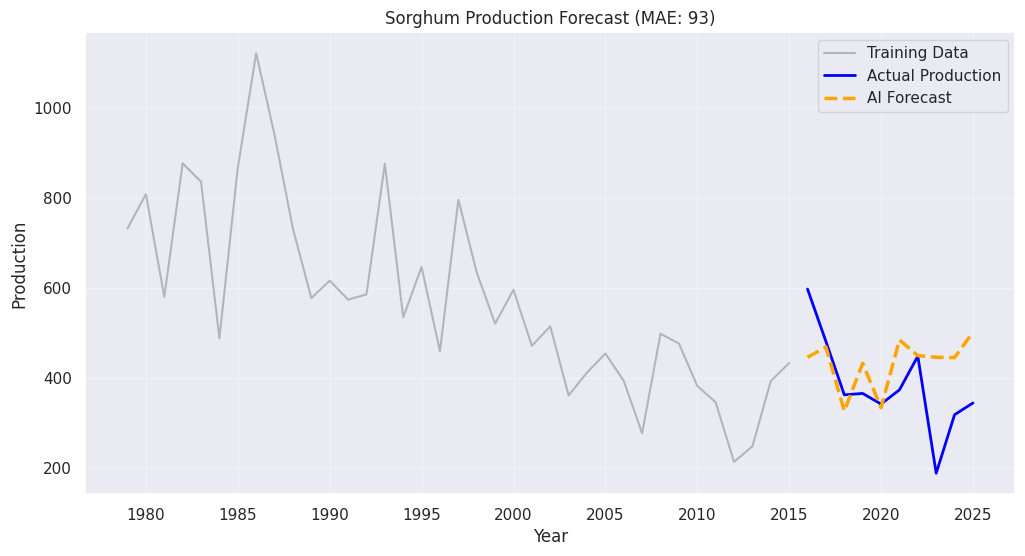

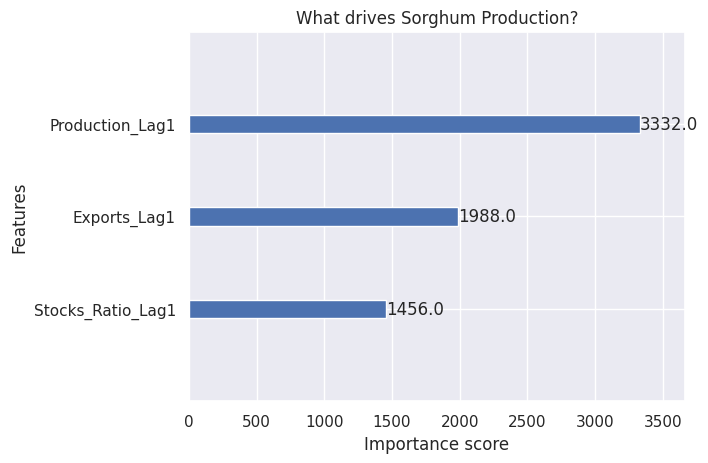

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train[target], label='Training Data', color='gray', alpha=0.5)
plt.plot(test.index, test[target], label='Actual Production', color='blue', linewidth=2)
plt.plot(test.index, preds, label='AI Forecast', color='orange', linestyle='--', linewidth=2.5)
plt.title(f'Sorghum Production Forecast (MAE: {mae:,.0f})')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 7. Feature Importance
xgb.plot_importance(model, max_num_features=10, title='What drives Sorghum Production?')
plt.show()

# Advanced Metrics

📊 Professional Evaluation Metrics:
   MAE  (Mean Absolute Error):     92.84 bushels
   RMSE (Root Mean Squared Error): 121.77 bushels (Penalizes large errors more)
   R² Score (Variance Explained):  -0.4011 (Closer to 1.0 is better)


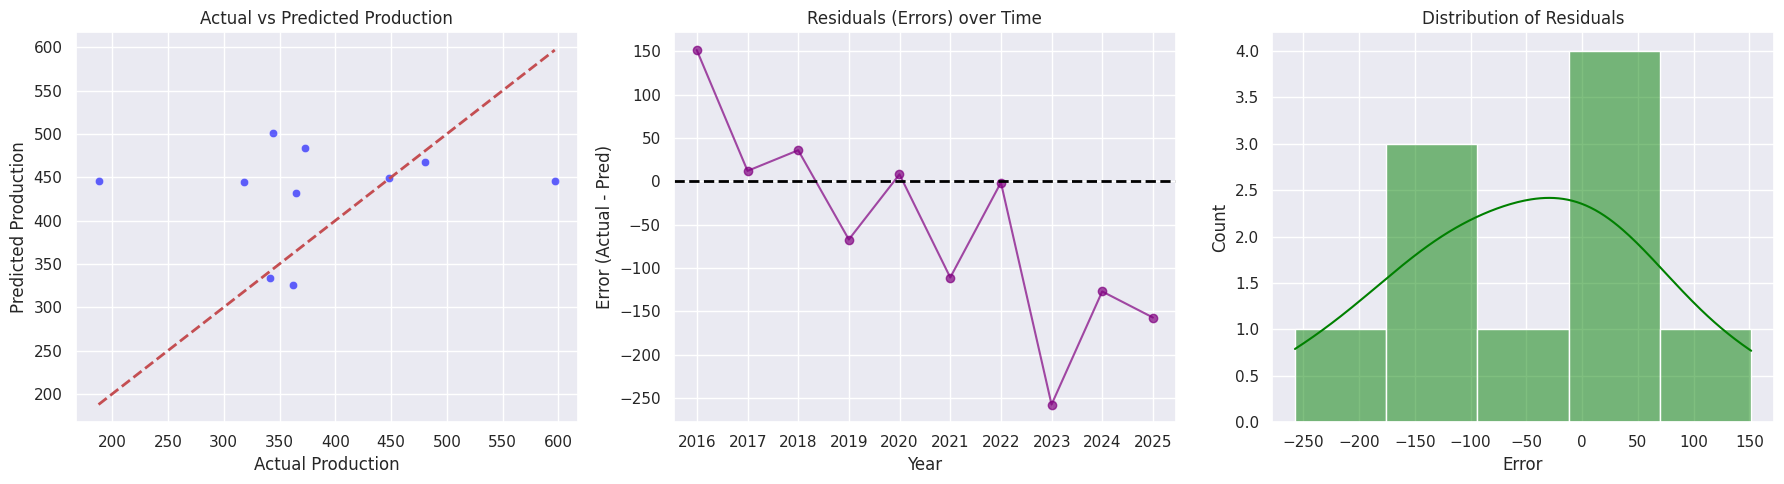

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Advanced Metrics ---
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print("📊 Professional Evaluation Metrics:")
print(f"   MAE  (Mean Absolute Error):     {mae:,.2f} bushels")
print(f"   RMSE (Root Mean Squared Error): {rmse:,.2f} bushels (Penalizes large errors more)")
print(f"   R² Score (Variance Explained):  {r2:.4f} (Closer to 1.0 is better)")

# --- 2. Residual Analysis ---
# Analyzing where the model makes mistakes
residuals = y_test - preds

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot A: Actual vs Predicted
# Ideal: All points on the red dashed line
sns.scatterplot(x=y_test, y=preds, ax=axes[0], color='blue', alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title('Actual vs Predicted Production')
axes[0].set_xlabel('Actual Production')
axes[0].set_ylabel('Predicted Production')

# Plot B: Residuals over Time
# Ideal: Random scatter around 0 (No patterns)
axes[1].plot(test.index, residuals, marker='o', linestyle='-', color='purple', alpha=0.7)
axes[1].axhline(0, color='black', linestyle='--', lw=2)
axes[1].set_title('Residuals (Errors) over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Error (Actual - Pred)')

# Plot C: Residual Distribution
# Ideal: Bell curve centered at 0 (Normal Distribution)
sns.histplot(residuals, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Residuals')
axes[2].set_xlabel('Error')

plt.tight_layout()
plt.show()

# Thank You